In [14]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [15]:
df = pd.read_csv('C:/Users/HP/OneDrive/Desktop/DATASETS/zomato.csv', encoding='latin1')

In [16]:
df.head(5)

,Restaurant _ID,Restaurant_Name,Country _Code,City,Locality,Cuisines,Average_Cost _for _two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price_range,Aggregate _rating,Rating _color,Rating _text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Dark Green,Excellent,229


# DATA CLEANING

**TASK 1: CHANGE THE COLUMN NAMES**

In [19]:
df=df.rename(columns={"Restaurant _ID" : "Restaurant ID",
                      "Restaurant_Name" : "Restaurant Name",
                      "Has Table booking" :"Table booking",
                      "Has Online delivery" : " Online delivery",
                      "Votes" :" User Votes Count",
                      "Rating _color" : "Rating Level",
                      "Rating _text" : "Rating Description",
                      "Aggregate _rating" : "Overall Rating",
                     "Average_Cost _for _two":" Average Cost for 2"})

df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country _Code', 'City', 'Locality',
       'Cuisines', ' Average Cost for 2', 'Currency', 'Table booking',
       ' Online delivery', 'Is delivering now', 'Price_range',
       'Overall Rating', 'Rating Level', 'Rating Description',
       ' User Votes Count'],
      dtype='object')

**TASK 2: REMOVE UNNECESSARY COLUMNS**

In [21]:
df=df.drop(columns=["Is delivering now"])
df.head(0)

,Restaurant ID,Restaurant Name,Country _Code,City,Locality,Cuisines,Average Cost for 2,Currency,Table booking,Online delivery,Price_range,Overall Rating,Rating Level,Rating Description,User Votes Count


**TASK 3: FILTERING the DataFrame by only keeping countries in which Zomato currently operates 
(India,UAE,Sri Lanka & Indonesia)**

In [23]:
df=df[df["Country _Code"].isin([1,214,191,94])]
df

,Restaurant ID,Restaurant Name,Country _Code,City,Locality,Cuisines,Average Cost for 2,Currency,Table booking,Online delivery,Price_range,Overall Rating,Rating Level,Rating Description,User Votes Count
564,18212135,Denny'S,214,Abu Dhabi,"Abu Dhabi Mall, Tourist Club Area (Al Zahiyah)",American,190,Emirati Diram(AED),No,No,4,4.6,Dark Green,Excellent,207
565,5704255,Famous Dave'S Barbecue,214,Abu Dhabi,"Abu Dhabi Mall, Tourist Club Area (Al Zahiyah)",American,260,Emirati Diram(AED),No,Yes,4,4.6,Dark Green,Excellent,376
566,5701978,Pizza Di Rocco,214,Abu Dhabi,Al Dhafrah,"Italian, Pizza",150,Emirati Diram(AED),Yes,Yes,3,4.4,Green,Very Good,471
567,5701729,Sofra Istanbul,214,Abu Dhabi,Al Dhafrah,"Turkish, Arabian, Middle Eastern",70,Emirati Diram(AED),No,No,2,4.3,Green,Very Good,224
568,5704168,Salt,214,Abu Dhabi,Al Mushrif,"Fast Food, Burger",100,Emirati Diram(AED),No,No,3,4.2,Green,Very Good,228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9512,5800710,The Manhattan Fish Market,191,Colombo,"Kollupitiya, Colombo 03","Seafood, Italian",4500,Sri Lankan Rupee(LKR),No,No,4,4.0,Green,Very Good,196
9513,5800433,The Sizzle,191,Colombo,"Kollupitiya, Colombo 03","American, Fast Food, Steak, Beverages",3000,Sri Lankan Rupee(LKR),No,No,3,4.2,Green,Very Good,286
9514,5800176,Ministry Of Crab,191,Colombo,"Old Dutch Hospital, Fort",Seafood,4000,Sri Lankan Rupee(LKR),No,No,4,4.9,Dark Green,Excellent,203
9515,5801321,Cafe Beverly,191,Colombo,"Rajagiriya, Colombo","Continental, American",2000,Sri Lankan Rupee(LKR),No,No,3,4.1,Green,Very Good,58


In [24]:
df1=pd.DataFrame(df)

**TASK 4: To create a column using "Country _Code" & deleting the old column**


In [26]:
# Defining the function to map country codes to country names
def country(Country_code):
    if Country_code == 1:
        return "India"
    elif Country_code == 214:
        return "UAE"
    elif Country_code == 191:
        return "Sri Lanka"
    elif Country_code == 94:
        return "Indonesia"
    else:
        return "Unknown"

# Applying the 'country' function to create the 'Country' column in df1
df1["Country"] = df1["Country _Code"].apply(country)

# Removing any existing 'Country' column in df to prevent duplication
if "Country" in df.columns:
    df.drop(columns=["Country"], inplace=True)

# Inserting the 'Country' column at position 2 in df
df.insert(2, "Country", df1["Country"])

# Then deleting the 'Country _Code' column 
df.drop(columns=["Country _Code"], inplace=True) 

**TASK 5: Checking the total NaN values in each Column**

In [28]:
nan_df = df.isna().sum()
nan_df

Restaurant ID          0
Restaurant Name        0
Country                0
City                   0
Locality               0
Cuisines               0
 Average Cost for 2    0
Currency               0
Table booking          0
 Online delivery       0
Price_range            0
Overall Rating         0
Rating Level           0
Rating Description     0
 User Votes Count      0
dtype: int64

# Data Analysis

**Q1: Analyse the customer preferences: AVG cost for the countries in comparision to India**

In [31]:
#deleting all the trim spaces
df.columns = df.columns.str.strip()
df.groupby("Country")["Average Cost for 2"].mean().sort_values(ascending=False)

Country
Indonesia    281190.476190
Sri Lanka      2375.000000
India           623.370319
UAE             166.416667
Name: Average Cost for 2, dtype: float64

**Q2: Analyse the customer preferences: Average Overall Rating for the countries in comparision to India**

In [42]:
overall=df.groupby("Country")["Overall Rating"].mean().sort_values(ascending=True)
overallrating= overall.reset_index()

overallrating.columns = ['Country','Average Overall Rating']

overallrating

,Country,Average Overall Rating
0,India,2.523324
1,Sri Lanka,3.870000
2,UAE,4.233333
3,Indonesia,4.295238


**Q3: Analyse the customer preferences: Distribution of cuisines for the countries in comparision to India**

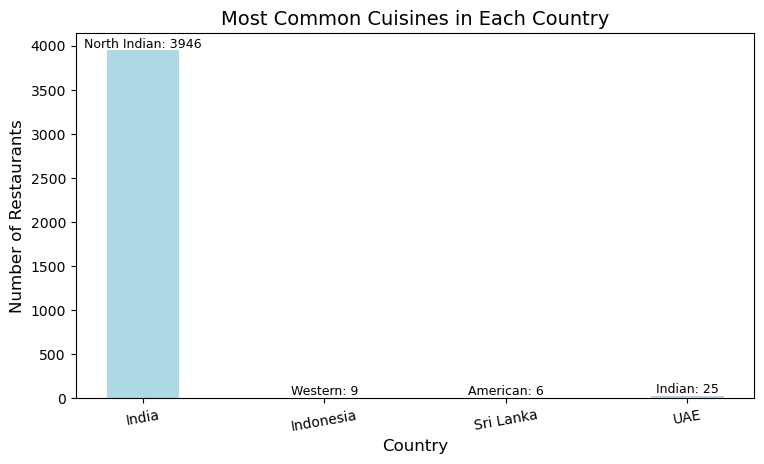

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtering the DataFrame for the countries of interest
countries_of_interest = ['India', 'Sri Lanka', 'UAE', 'Indonesia']
df_filtered = df[df['Country'].isin(countries_of_interest)]
df_filtered['Cuisines'] = df_filtered['Cuisines'].str.split(',')
df_exploded = df_filtered.explode('Cuisines')
df_exploded['Cuisines'] = df_exploded['Cuisines'].str.strip()
cuisine_distribution = df_exploded.groupby(['Country', 'Cuisines']).size().reset_index(name='Count')

# Finding the most common cuisine for each country
dominant_cuisines = cuisine_distribution.loc[cuisine_distribution.groupby('Country')['Count'].idxmax()]
 
plt.figure(figsize=(8, 5))
bars = plt.bar(dominant_cuisines['Country'], dominant_cuisines['Count'], color='lightblue', width=0.4)

plt.xticks(rotation=10, ha='center', fontsize=10)
plt.yticks(fontsize=10)

for bar, cuisine, count in zip(bars, dominant_cuisines['Cuisines'], dominant_cuisines['Count']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{cuisine}: {count}', ha='center', va='bottom', fontsize=9)

plt.title('Most Common Cuisines in Each Country', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)

plt.tight_layout(pad=2.0)
plt.show()




**Q4: Analyse the customer preferences: Popular price points for the countries in comparision to India**

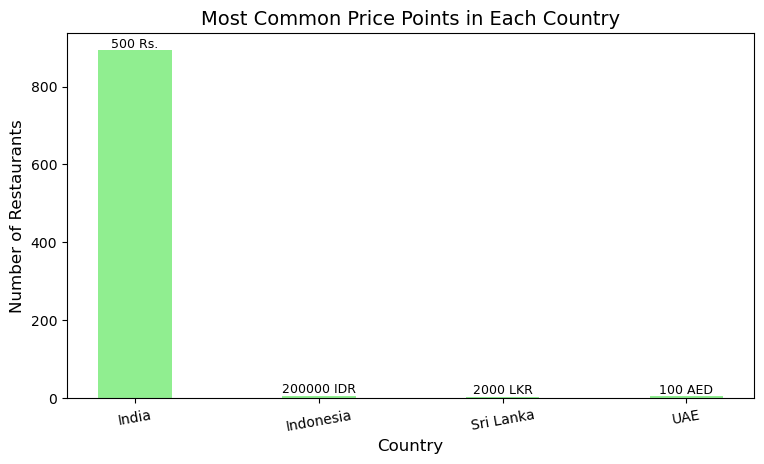

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

countries_of_interest = ['India', 'Sri Lanka', 'UAE', 'Indonesia']
df_filtered = df[df['Country'].isin(countries_of_interest)]
price_distribution = df_filtered.groupby(['Country', 'Average Cost for 2']).size().reset_index(name='Count')


popular_price_points = price_distribution.loc[price_distribution.groupby('Country')['Count'].idxmax()]
currency_map = { 'India': 'Rs.','Sri Lanka': 'LKR','UAE': 'AED','Indonesia': 'IDR'}

popular_price_points['Price with Currency'] = popular_price_points.apply(
    lambda row: f"{row['Average Cost for 2']} {currency_map[row['Country']]}", axis=1)

plt.figure(figsize=(8, 5))
bars = plt.bar(popular_price_points['Country'], popular_price_points['Count'], color='lightgreen', width=0.4)
plt.xticks(rotation=10, ha='center', fontsize=10)
plt.yticks(fontsize=10)

for bar, price in zip(bars, popular_price_points['Price with Currency']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, price, ha='center', va='bottom', fontsize=9)

plt.title('Most Common Price Points in Each Country', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.tight_layout(pad=2.0)
plt.show()


**Q5: Analyse if restaurants with lower average costs has higher ratings,more customer reviews & more User Votes Count in the regions**


In [55]:
# Filtering the data for each country
india_data = df[df["Country"] == 'India']
uae_data = df[df["Country"] == 'UAE']
indonesia_data = df[df["Country"] == 'Indonesia']
sri_lanka_data = df[df["Country"] == 'Sri Lanka']

# Calculating the correlation between Overall Rating and Average Cost for each country
corr_rating_india = india_data['Overall Rating'].corr(india_data['Average Cost for 2'])
corr_rating_uae = uae_data['Overall Rating'].corr(uae_data['Average Cost for 2'])
corr_rating_indonesia = indonesia_data['Overall Rating'].corr(indonesia_data['Average Cost for 2'])
corr_rating_sri_lanka = sri_lanka_data['Overall Rating'].corr(sri_lanka_data['Average Cost for 2'])

# Calculating the correlation between User Votes Count and Average Cost for each country
corr_votes_india = india_data['User Votes Count'].corr(india_data['Average Cost for 2'])
corr_votes_uae = uae_data['User Votes Count'].corr(uae_data['Average Cost for 2'])
corr_votes_indonesia = indonesia_data['User Votes Count'].corr(indonesia_data['Average Cost for 2'])
corr_votes_sri_lanka = sri_lanka_data['User Votes Count'].corr(sri_lanka_data['Average Cost for 2'])

# Creating a DataFrame to hold the correlation values for each country
corr = pd.DataFrame({
    'Country': ['India', 'UAE', 'Indonesia', 'Sri Lanka'],
    'Correlation with Avg Cost (Overall Rating)': [corr_rating_india, corr_rating_uae, corr_rating_indonesia, corr_rating_sri_lanka],
    'Correlation with Avg Cost (User Votes Count)': [corr_votes_india, corr_votes_uae, corr_votes_indonesia, corr_votes_sri_lanka]})
corr


,Country,Correlation with Avg Cost (Overall Rating),Correlation with Avg Cost (User Votes Count)
0,India,0.344172,0.281765
1,UAE,0.365525,0.198292
2,Indonesia,0.187885,0.126528
3,Sri Lanka,0.225974,0.359805


**Q6:To check if Restaurants that offer online delivery will have more customer Votes Count regardless of their location**

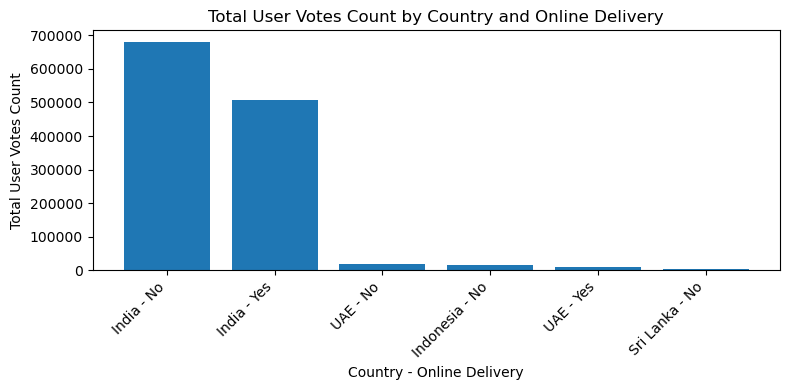

In [57]:
# Group by 'Online delivery' and 'Country', sum 'User Votes Count', and sort the result
m = df.groupby(["Online delivery", "Country"])["User Votes Count"].sum().sort_values(ascending=False)
m = m.reset_index()
m.columns = ['Online delivery', 'Country', 'Total User Votes Count']
# Plotting 
plt.figure(figsize=(8, 4)) 
plt.bar(m['Country'] + ' - ' + m['Online delivery'], m['Total User Votes Count'])
# Adding labels and title
plt.xlabel('Country - Online Delivery')
plt.ylabel('Total User Votes Count')
plt.title('Total User Votes Count by Country and Online Delivery')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.show()


**Q7: Check if Table Booking Restaurants have better AVG rating or not**

In [63]:
n = df.groupby(["Country", "Table booking"]).agg({"Overall Rating": "mean","User Votes Count": "sum"}).sort_values(by="Overall Rating", ascending=False)
n = n.reset_index()
n.columns = ['Country','Table booking','Average Overall Rating','Total User Votes Count']
n


,Country,Table booking,Average Overall Rating,Total User Votes Count
0,UAE,Yes,4.477778,12743
1,Indonesia,No,4.295238,16214
2,UAE,No,4.128571,16868
3,Sri Lanka,No,3.870000,2929
4,India,Yes,3.400000,385428
5,India,No,2.394165,801735


**Q8: Check if Online Delivery service Restaurants have better Rating or not**

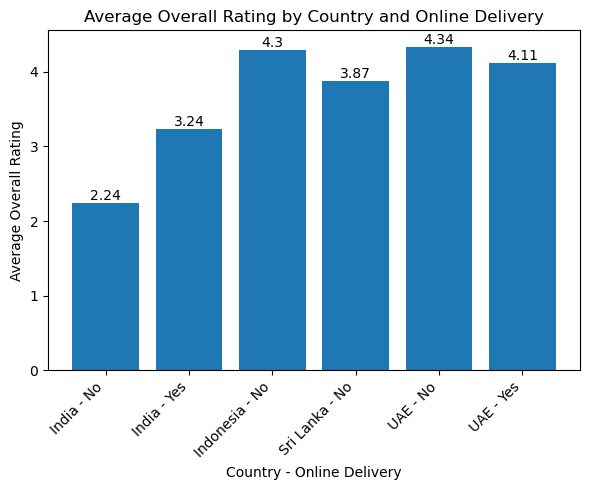

In [65]:
o=df.groupby(["Country", "Online delivery"])["Overall Rating"].mean()
o= o.reset_index()
o.columns = ['Country','Online delivery','Average Overall Rating']

plt.figure(figsize=(6,5)) 
bars = plt.bar(o['Country'] + ' - ' + o['Online delivery'], o['Average Overall Rating'])

# Adding labels and title
plt.xlabel('Country - Online Delivery')
plt.ylabel('Average Overall Rating')
plt.title('Average Overall Rating by Country and Online Delivery')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()


**Q9:Identify underperforming Restaurants within each country for improvement (RED,ORANGE,POOR,<3)**

In [135]:
underperform= df[(df["Rating Level"].isin(["Red", "Orange"])) & (df["Rating Description"] == "Poor") & (df["Overall Rating"] < 3)].sort_values(by="Overall Rating")
underperform_grouped=underperform.groupby("Country")["Overall Rating"].value_counts(ascending=False).reset_index(name='Count')
underperform_grouped.columns = ['Country', 'Overall Rating', 'Count']
underperform_grouped

,Country,Overall Rating,Count
0,India,2.4,83
1,India,2.3,46
2,India,2.2,26
3,India,2.1,15
4,India,2.0,7
5,India,1.9,2
6,India,1.8,1
7,Sri Lanka,2.4,1
8,UAE,2.4,1


**Q10:Identify highperforming restaurants within each country**

In [157]:
highperform=df[(df["Rating Level"].isin(["Dark Green","Green"])) & (df["Rating Description"].isin(["Excellent"])) & (df["Overall Rating"] >=4)].sort_values(by="Overall Rating")
highperform_grouped=highperform.groupby("Country")["Overall Rating"].value_counts().reset_index(name='Count')
highperform_grouped.columns = ['Country', 'Overall Rating', 'Count']
highperform_grouped

,Country,Overall Rating,Count
0,India,4.5,37
1,India,4.6,35
2,India,4.9,19
3,India,4.7,16
4,India,4.8,9
5,Indonesia,4.9,4
6,Indonesia,4.6,3
7,Sri Lanka,4.5,1
8,Sri Lanka,4.9,1
9,UAE,4.5,6


**Q11:Identify the average "Overall Rating" of Restaurants offering both services "Table booking" & "Online delivery"**

In [94]:
identify=Highperform[(Highperform["Table booking"]=="Yes")&(Highperform["Online delivery"]=="Yes")]
identify.groupby("Country")["Overall Rating"].mean().sort_values(ascending=False)

Country
India    4.607692
Name: Overall Rating, dtype: float64

**Q12:To identify localities and cities with successful restaurants in India**

In [240]:
high_rated_restaurants = df[(df["Overall Rating"] >= 4)]


high_votes = high_rated_restaurants[high_rated_restaurants["User Votes Count"] > high_rated_restaurants["User Votes Count"].mean()]

success_metrics = high_votes.groupby(["Country", "City", "Locality"]).agg(
    highest_rating=("Overall Rating", "max"),
    total_user_votes=("User Votes Count", "sum"),
    restaurant_count=("Restaurant ID", "nunique")).reset_index()

success_metrics_sorted = success_metrics.sort_values(by=["total_user_votes", "restaurant_count"], ascending=False)
success_metrics_sorted = success_metrics_sorted[success_metrics_sorted["total_user_votes"] > 100]  
success_metrics_sorted



,Country,City,Locality,highest_rating,total_user_votes,restaurant_count
82,India,New Delhi,Connaught Place,4.9,37610,19
8,India,Bangalore,Indiranagar,4.8,18249,4
38,India,Gurgaon,"Cyber Hub, DLF Cyber City",4.3,16716,8
10,India,Bangalore,Koramangala 5th Block,4.7,15052,2
63,India,Kolkata,Park Street Area,4.9,14615,3
...,...,...,...,...,...,...
18,India,Chandigarh,Sector 35,4.1,698,1
2,India,Ahmedabad,Ellis Bridge,4.4,697,1
116,India,New Delhi,"Sangam Courtyard, RK Puram",4.1,695,1
86,India,New Delhi,East of Kailash,4.1,686,1
